<a href="https://colab.research.google.com/github/Tejaswidarsi/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Lab Exercise 1: Understanding PCA with the Iris Dataset

####Objective: To understand the basic principles of PCA by reducing the dimensionality of a simple dataset.

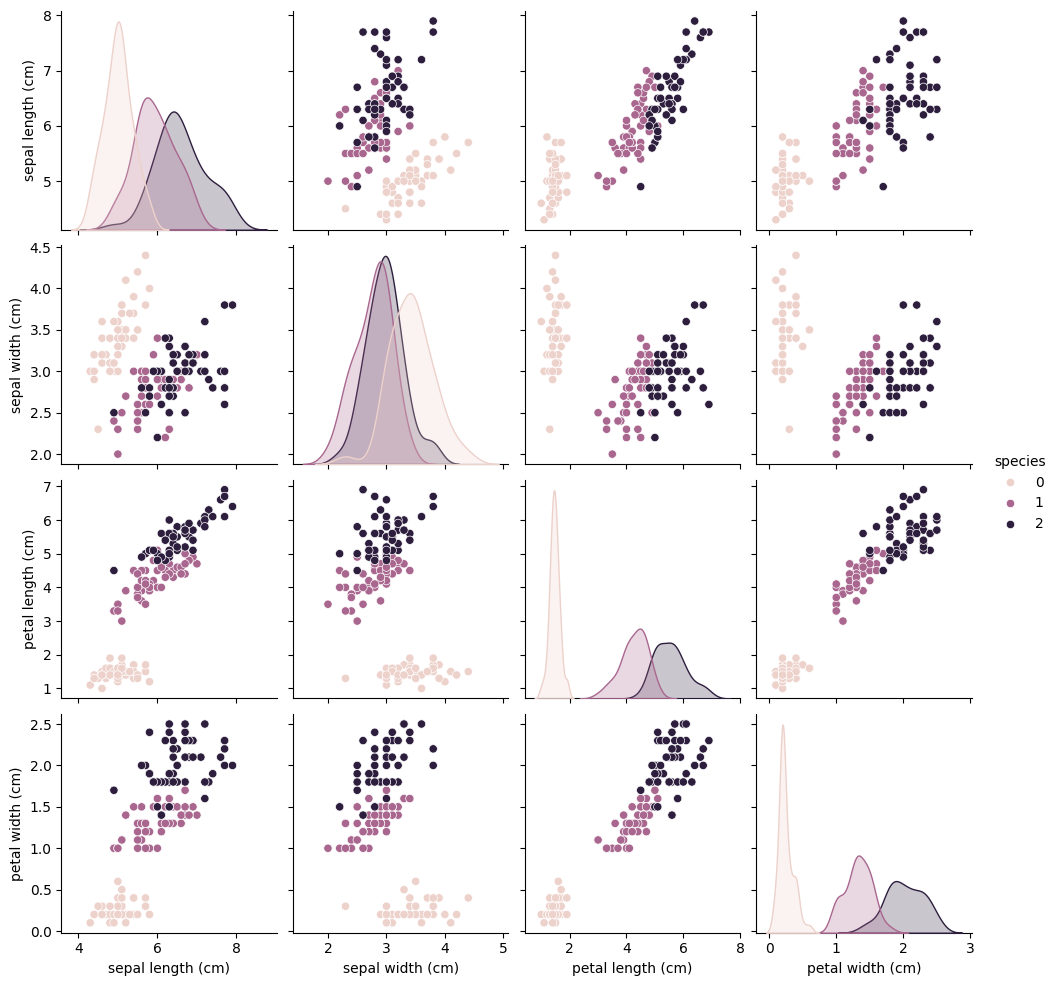

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# EDA - Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()


In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean = 0, std dev = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)



In [3]:
# Compute covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [4]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [5]:
# Sort eigenvectors by eigenvalues
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Project data onto the first two principal components
X_pca = np.dot(X_scaled, sorted_eigenvectors[:, :2])


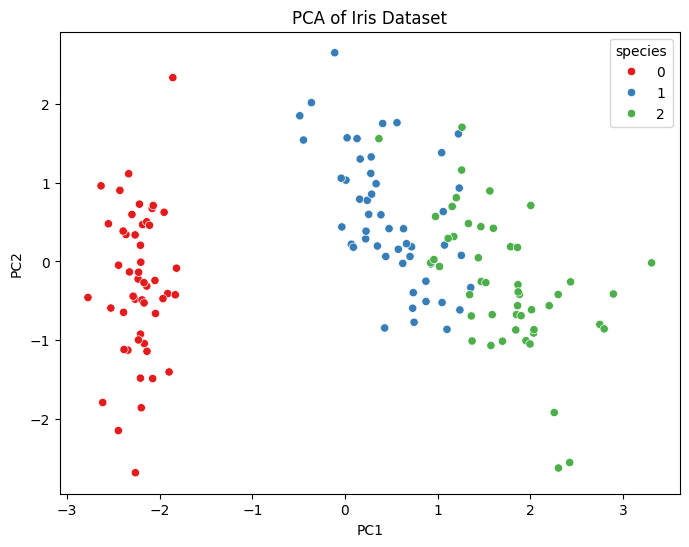

In [6]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')
plt.title('PCA of Iris Dataset')
plt.show()



###Lab Exercise 2: PCA for Image Compression


####Objective: Use PCA to compress and then reconstruct an image, demonstrating the power of dimensionality reduction in data compression.

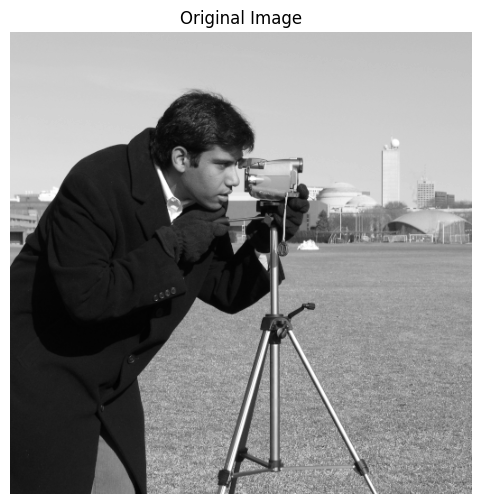

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import data

# Load a grayscale image (skimage provides sample images, or you can load your own)
# Example: Load a sample grayscale image of a face
image = data.camera()  # Sample image (grayscale, 512x512)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Image")+

plt.axis('off')
plt.show()


In [8]:
# Reshape the image into a 2D matrix (flattening)
image_reshaped = image.reshape(image.shape[0], -1)

print("Reshaped image shape:", image_reshaped.shape)


Reshaped image shape: (512, 512)


In [9]:
# Apply PCA with varying numbers of components
def apply_pca_and_reconstruct(image_reshaped, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(image_reshaped)

    # Transform the image data to reduce dimensions
    image_pca = pca.transform(image_reshaped)

    # Reconstruct the image from the reduced data
    image_reconstructed = pca.inverse_transform(image_pca)

    # Reshape the reconstructed image back to the original shape
    image_reconstructed = image_reconstructed.reshape(image.shape)

    return image_reconstructed

# List of components to use for reconstruction
components = [5, 20, 50, 100]


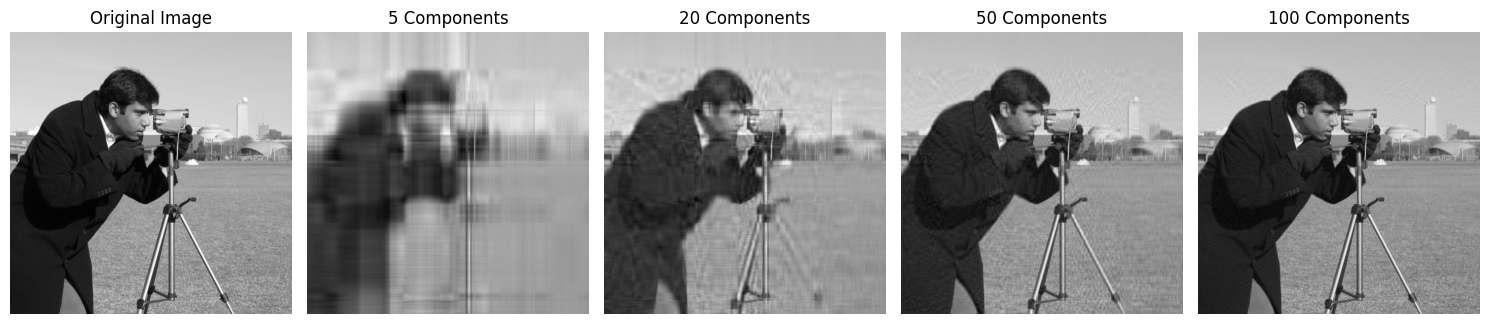

In [10]:
# Plot original and reconstructed images
fig, axes = plt.subplots(1, len(components) + 1, figsize=(15, 6))

# Display the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display reconstructed images with different components
for i, n_comp in enumerate(components):
    reconstructed_image = apply_pca_and_reconstruct(image_reshaped, n_comp)
    axes[i + 1].imshow(reconstructed_image, cmap='gray')
    axes[i + 1].set_title(f"{n_comp} Components")
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()


###Lab Exercise 3: PCA for Feature Reduction in a Classification Task


####Objective: Apply PCA as a preprocessing step to reduce the feature space for a classification problem and compare its effect on model performance.

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Check the dataset shape
print("Features shape:", X.shape)


Features shape: (178, 13)


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train a baseline model without PCA (Logistic Regression)
model_baseline = LogisticRegression(max_iter=1000)
model_baseline.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_baseline = model_baseline.predict(X_test_scaled)

# Evaluate performance
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_precision = precision_score(y_test, y_pred_baseline, average='macro')
baseline_recall = recall_score(y_test, y_pred_baseline, average='macro')

print("Baseline Model Performance:")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"Precision: {baseline_precision:.4f}")
print(f"Recall: {baseline_recall:.4f}")


Baseline Model Performance:
Accuracy: 0.9815
Precision: 0.9778
Recall: 0.9841


In [14]:
# Function to apply PCA and return transformed data
def apply_pca(X_train_scaled, X_test_scaled, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    return X_train_pca, X_test_pca

# List of components to try
components_list = [2, 5, 10]


In [15]:
# Dictionary to store results for each PCA reduction
results = {}

# Train and evaluate models with PCA
for n_components in components_list:
    # Apply PCA
    X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled, n_components)

    # Train a logistic regression model on the PCA-reduced data
    model_pca = LogisticRegression(max_iter=1000)
    model_pca.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred_pca = model_pca.predict(X_test_pca)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred_pca)
    precision = precision_score(y_test, y_pred_pca, average='macro')
    recall = recall_score(y_test, y_pred_pca, average='macro')

    # Store the results
    results[n_components] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

    print(f"PCA with {n_components} components - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


PCA with 2 components - Accuracy: 0.9630, Precision: 0.9710, Recall: 0.9649
PCA with 5 components - Accuracy: 0.9815, Precision: 0.9833, Recall: 0.9762
PCA with 10 components - Accuracy: 0.9815, Precision: 0.9778, Recall: 0.9841


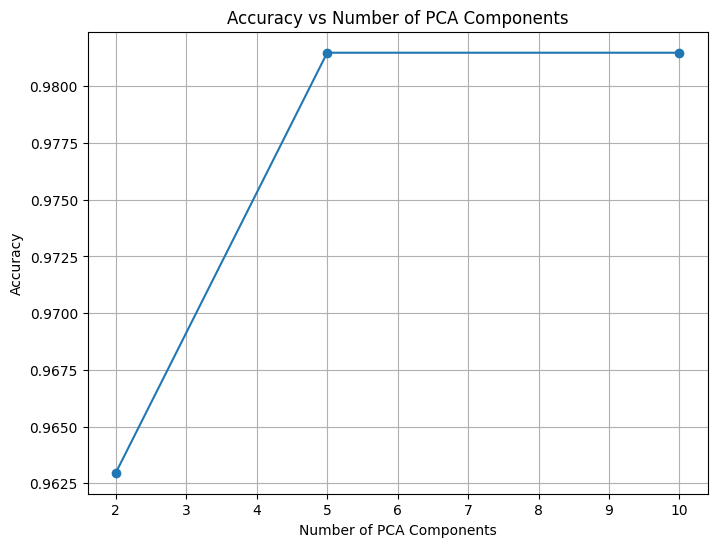

In [16]:
# Plot accuracy vs number of PCA components
n_components = list(results.keys())
accuracy_values = [results[n]['accuracy'] for n in n_components]

plt.figure(figsize=(8, 6))
plt.plot(n_components, accuracy_values, marker='o')
plt.title("Accuracy vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
